In [60]:
from pathlib import Path
from urllib.request import urlretrieve
import gzip, pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import islice
import os

In [3]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'

In [4]:
path = Path()
path_data = path/'data'
path_gz = path_data/'mnist.pkl.gz'

In [5]:
if not path_gz.exists(): 
    urlretrieve(MNIST_URL,path_gz)

In [6]:
with gzip.open(path_gz, "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [7]:
list1 = list(x_train[0])
vals = list1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [8]:
def chunks(x, bs):
    for i in range(0, len(x), bs): yield x[i:i+bs]

In [9]:
it = chunks(vals, 5)
list(it)

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

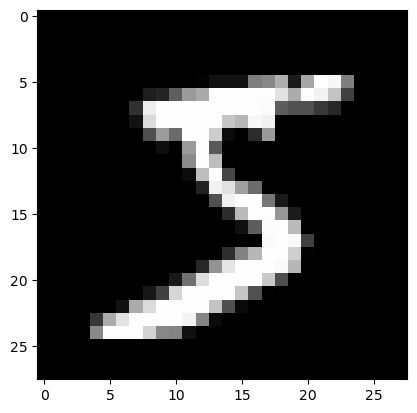

In [10]:
mpl.rcParams['image.cmap'] ='gray'
plt.imshow(list(chunks(list1,28)))

In [11]:
it = iter(vals)

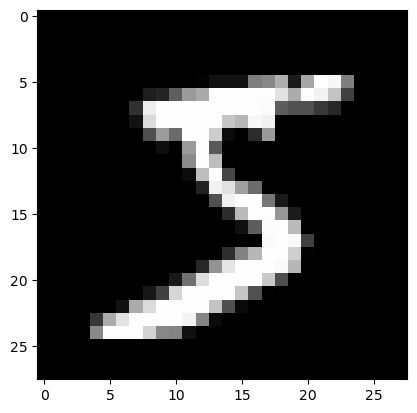

In [12]:
list(islice(it, 5))
it = iter(list1)
img = list(iter(lambda: list(islice(it, 28)), []))
plt.imshow(img)

In [18]:
img[15][15]

0.7265625

In [28]:
class Matrix():
    def __init__(self, ds): self.ds = ds
    def __getitem__(self, idxs): return self.ds[idxs[0]][idxs[1]]

In [29]:
img2 = Matrix(img) 

In [30]:
img2[15,15]

0.7265625

In [34]:
import torch
from torch import tensor

In [38]:
x_train, y_train, x_valid, y_valid = map(tensor,(x_train, y_train, x_valid, y_valid))

In [51]:
x_train.shape

torch.Size([50000, 784])

In [48]:
imgs = x_train.reshape(-1, 28,28)

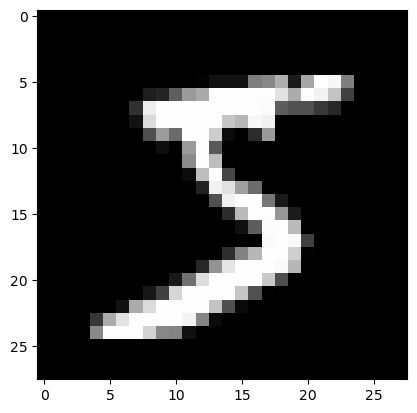

In [49]:
plt.imshow(imgs[0])

In [53]:
imgs.shape

torch.Size([50000, 28, 28])

In [56]:
rnd_state = None
def seed(a):
    global rnd_state
    a,x = divmod(a, 30268)
    a,y = divmod(a, 30306)
    a,z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [57]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [58]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * x) % 30307
    z = (173 * x) % 30323
    rnd_state = x, y , z 
    return (x/30269 + y/30307 + z/30323) % 1.0

In [59]:
rand(),rand(),rand()
     

(0.3951280017030693, 0.5180000072016968, 0.5780012314901617)

In [63]:
if os.fork(): print(f'Parent: {rand()}')
else: 
    print(f'Child: {rand()}')
    os._exit(os.EX_OK)

Parent: 0.857068389613358


Child: 0.857068389613358


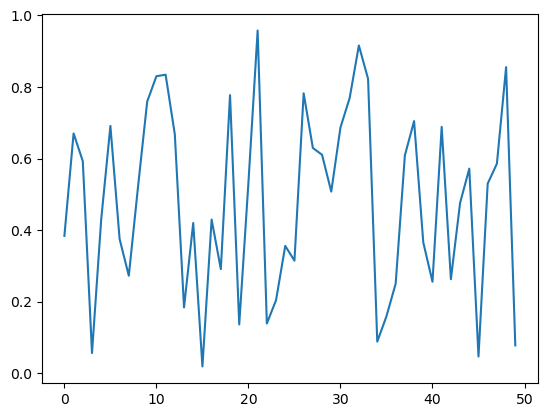

In [66]:
plt.plot([rand() for _ in range(50)])

(array([ 989.,  973., 1017., 1021., 1007., 1030.,  966., 1015., 1026.,
         956.]),
 array([3.01985373e-05, 9.99762013e-02, 1.99922204e-01, 2.99868207e-01,
        3.99814209e-01, 4.99760212e-01, 5.99706215e-01, 6.99652218e-01,
        7.99598220e-01, 8.99544223e-01, 9.99490226e-01]),
 <BarContainer object of 10 artists>)

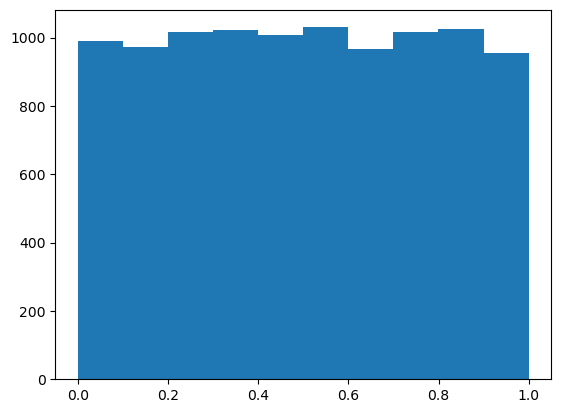

In [68]:
plt.hist([rand() for _ in range(10000)])

(array([  2.,   2.,   4.,  12.,  18.,  33.,  69., 140., 170., 286., 393.,
        513., 616., 813., 874., 882., 963., 863., 802., 680., 574., 430.,
        318., 220., 137.,  84.,  49.,  33.,  15.,   5.]),
 array([-3.78104663, -3.54680419, -3.31256151, -3.07831907, -2.84407663,
        -2.60983396, -2.37559152, -2.14134884, -1.9071064 , -1.67286384,
        -1.4386214 , -1.20437884, -0.97013628, -0.73589379, -0.50165123,
        -0.26740873, -0.0331662 ,  0.20107633,  0.43531886,  0.66956139,
         0.90380388,  1.13804638,  1.37228894,  1.6065315 ,  1.84077406,
         2.0750165 ,  2.30925918,  2.54350162,  2.77774405,  3.01198673,
         3.24622917]),
 <BarContainer object of 30 artists>)

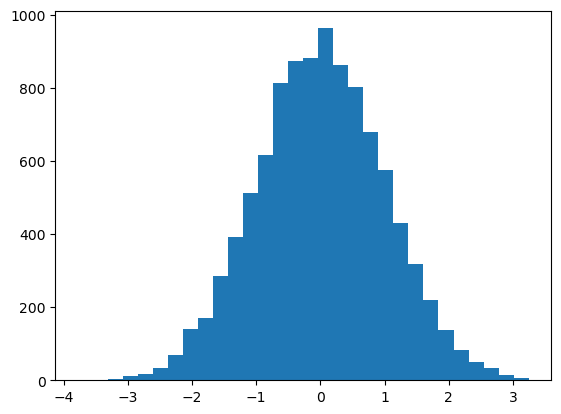

In [72]:
plt.hist([torch.randn(10000)], bins=30)

In [76]:
%timeit -n 10 (torch.randn(784,10))

The slowest run took 7.94 times longer than the fastest. This could mean that an intermediate result is being cached.
60.3 µs ± 71.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)],10))

2.39 ms ± 88.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
%timeit?

Docstring:
Time execution of a Python statement or expression

Usage, in line mode:
  %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
or in cell mode:
  %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
  code
  code...

Time execution of a Python statement or expression using the timeit
module.  This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, the statement in the first line is used as setup code
  (executed but not timed) and the body of the cell is timed.  The cell
  body has access to any variables created in the setup code.

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
best result.
Default: 7

-t: use time.time to measure the time, which is the default on Unix.
This f